In [106]:
print("hiz")

hiz


In [107]:
import logging
import torch
from torchsummary import summary
import torch.optim as optim
import torch.nn as nn
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import cv2
import torchvision.transforms.v2 as transforms
import numpy as np
from pothole.datasets import PotholeDataset
logging.basicConfig(level=logging.INFO, format='%(name)s: %(message)s')

In [108]:
logging.getLogger().setLevel(logging.DEBUG)
LOG = logging.getLogger(__name__)

In [109]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


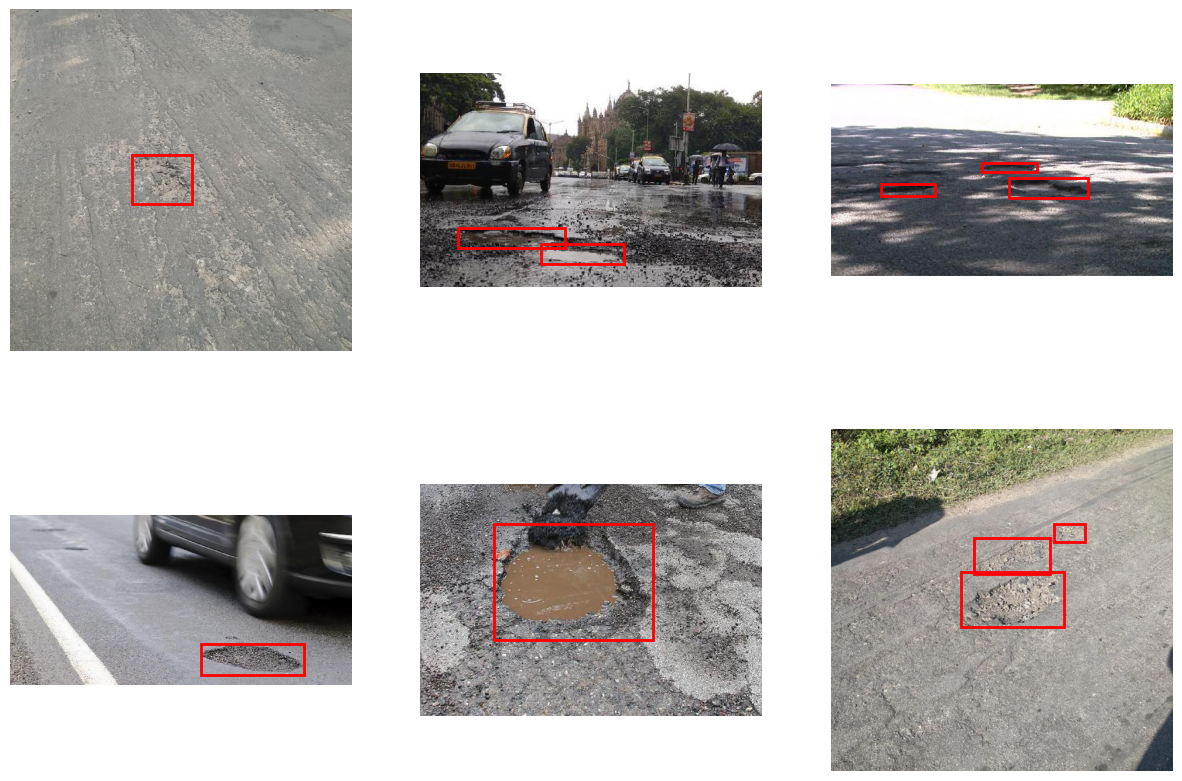

In [110]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import os
import random
import xml.etree.ElementTree as ET

# Directory containing the images and XML files
# directory = "/zhome/25/e/155273/Desktop/02516_dvcv/02516_pothole_w3/data/Potholes/annotated-images"
directory = "data/Potholes/annotated-images"
# Generate a list of image file names and their corresponding XML files
image_files = [f"img-{i}.jpg" for i in range(1, 632)]
xml_files = [f"img-{i}.xml" for i in range(1, 632)]

# Randomly select 6 image files and their corresponding XML files
selected_indices = random.sample(range(1, 632), 6)
selected_image_paths = [os.path.join(directory, image_files[i-1]) for i in selected_indices]
selected_xml_paths = [os.path.join(directory, xml_files[i-1]) for i in selected_indices]

# Set up the figure and axes for a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Function to parse bounding boxes from XML file
def parse_bndbox(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bndboxes = []
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
        bndboxes.append((xmin, ymin, xmax, ymax))
    return bndboxes

# Display images with bounding boxes
for ax, img_path, xml_path in zip(axes.ravel(), selected_image_paths, selected_xml_paths):
    # Read image and corresponding XML file
    img = mpimg.imread(img_path)
    bndboxes = parse_bndbox(xml_path)
    
    # Display image
    ax.imshow(img)
    ax.axis('off')
    
    # Add bounding boxes to the image
    for (xmin, ymin, xmax, ymax) in bndboxes:
        rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='r', facecolor='none')
        # rect = patches.Rectangle((50, 50), 150, 100, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)





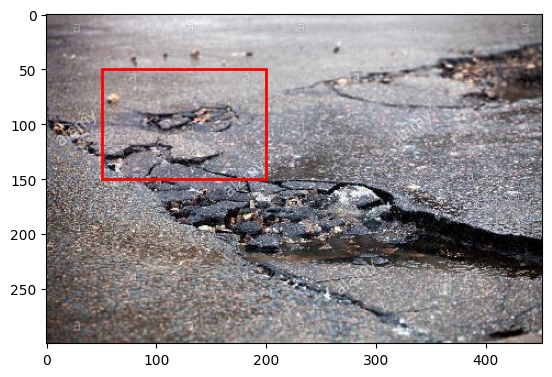

In [111]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Load the image
img_path = "data/Potholes/annotated-images/img-631.jpg"  # Replace with the path to your actual image
img = mpimg.imread(img_path)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Create a rectangle patch
rect = patches.Rectangle((50, 50), 150, 100, linewidth=2, edgecolor='r', facecolor='none')

# Add the rectangle to the Axes
ax.add_patch(rect)

# Show the plot
plt.show()


In [112]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [113]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [114]:
import torchvision.datasets as datasets
image_transform = transforms.Compose([
        transforms.ToImage(),
        transforms.ToDtype(torch.float32, scale=True),
    ])
trainset = PotholeDataset("train", image_transform=image_transform)
testset = PotholeDataset("validation", image_transform=image_transform)
valset = PotholeDataset("test", image_transform=image_transform)


batch_size = 1
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=3)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=3)
val_loader = DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=3)

In [115]:
# foo, bar = trainset[0]
# print(f'img: {foo.shape}, label: {bar}')

# for i, (img, label) in enumerate(train_loader):
#     print(f'img: {img.shape}, label: {label.shape}')
#     if i == 3:
#         break
img, label = next(iter(train_loader))
print(label.shape)
print(img)

torch.Size([1, 9, 4])
tensor([[[[0.8510, 0.7882, 0.8706,  ..., 0.2000, 0.1686, 0.2039],
          [0.8235, 0.8000, 0.8078,  ..., 0.1922, 0.1765, 0.2157],
          [0.8627, 0.7608, 0.7804,  ..., 0.1804, 0.1647, 0.1922],
          ...,
          [0.3725, 0.3961, 0.4118,  ..., 0.4824, 0.5294, 0.5255],
          [0.4314, 0.4431, 0.4353,  ..., 0.4863, 0.5333, 0.5255],
          [0.4667, 0.4745, 0.4627,  ..., 0.5216, 0.5373, 0.5059]],

         [[0.8549, 0.7922, 0.8745,  ..., 0.1647, 0.1333, 0.1686],
          [0.8235, 0.8078, 0.8078,  ..., 0.1569, 0.1412, 0.1804],
          [0.8588, 0.7647, 0.7765,  ..., 0.1451, 0.1294, 0.1569],
          ...,
          [0.2784, 0.3020, 0.3176,  ..., 0.4392, 0.4863, 0.4824],
          [0.3294, 0.3412, 0.3333,  ..., 0.4431, 0.4902, 0.4824],
          [0.3647, 0.3725, 0.3608,  ..., 0.4784, 0.4941, 0.4627]],

         [[0.8627, 0.8000, 0.8824,  ..., 0.1294, 0.1137, 0.1490],
          [0.8235, 0.8039, 0.8078,  ..., 0.1216, 0.1216, 0.1608],
          [0.8431, 0

In [116]:
def selective_search(image, method="fast"):
    # image = cv2.imread(image_path)
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

    ss.setBaseImage(image)

    if method == "fast":
        ss.switchToSelectiveSearchFast()
    else:
        ss.switchToSelectiveSearchQuality()
    rects = ss.process()
    return rects

In [117]:
#use sklearn instead
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [118]:
def bb_intersection_over_union(boxA, boxB):

    # x_distance = abs(boxA[0] - boxB[0])
    # y_distance = abs(boxA[1] - boxB[1])
    

    # I don't understand this?
    # Determine the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    
    # Compute the area of intersection
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # Compute the area of both the proposal and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # Compute the area of union
    unionArea = boxAArea + boxBArea - interArea

    

    # Compute the IoU by dividing the intersection area by the union area
    iou = interArea / float(unionArea)

    # Return the intersection and union areas
    return interArea, unionArea, iou

In [119]:
from sklearn.metrics import jaccard_score

def evaluate_proposals(proposals, ground_truths, iou_threshold=0.6):
    true_positives = 0
    LOG.debug(f'--proposals: {proposals}\t ground_truths:{ground_truths}\n--')
    #i = <intersection here>
    #u = <union here>
    # iou = jaccard_score(proposals, ground_truths)
    _, _, iou = bb_intersection_over_union(proposals, ground_truths)
    
    LOG.info(f'IOU: {iou}')


    return true_positives


    
    # for proposal in proposals:
    #     LOG.debug(f'--proposal: {proposal}\n--')
    #     for ground_truth in ground_truths:
    #         LOG.debug(f'ground_truth: {ground_truth}\n')
    #         # iou = calculate_iou(proposal, ground_truth)¨
    #         iou = jaccard_score(proposal, ground_truth)
    #         if iou >= iou_threshold:
    #             true_positives += 1
    #             break  # Each proposal is only counted once



In [120]:
def calculate_iou(box1, box2):
    # LOG.info(f'box1: {box1}\nbox2: {box2}\n')
    x1,y1,w1,h1 = box1
    x2,y2,w2,h2 = box2
    x_intersection = max(x1,x2)
    y_intersection = max(y1,y2)
    w_intersection = min(x1+w1,x2+w2) - x_intersection
    h_intersection = min(y1+h1,y2+h2) - y_intersection

    if w_intersection <= 0 or h_intersection <= 0:
        return 0
    
    area_intersection = w_intersection * h_intersection
    area_union = w1*h1 + w2*h2 - area_intersection
    iou = area_intersection / area_union
    return iou

In [121]:
def expand_boundingbox(rectangles):
    expansion_factor = 1.7
    exps_rectangles = rectangles.copy()
    exps_rectangles[:, 2] = rectangles[:, 2] * expansion_factor
    exps_rectangles[:, 3] = rectangles[:, 3] * expansion_factor
    return exps_rectangles

In [205]:
def label_proposals(all_proposals, labels,max_threshold_iou=0.001):
    best_bbs = []
    if labels.ndim > 1:
        LOG.info(f'labels: {labels.ndim}\n labels: {labels}')
        for label in labels:
            best_bb = (None, "pothole")
            max_iou = max_threshold_iou
            for proposal in all_proposals:
                iou = calculate_iou(proposal, label)
                if iou > max_iou:
                    max_iou = iou
                    best_bb = (proposal, "pothole")
            best_bbs.append(best_bb)
    else:
        max_iou = max_threshold_iou
        best_bb = (None, "pothole")
        for proposal in all_proposals:
            iou = calculate_iou(proposal, labels)
            if iou > max_iou:
                max_iou = iou
                best_bb = (proposal, "pothole")
        best_bbs.append(best_bb)
    return best_bbs

In [195]:
image, labels = next(iter(train_loader))
image = image.squeeze().permute(1, 2, 0).numpy()
labels = labels.squeeze().numpy()
all_proposals = selective_search(image, method="notsofast")
exps_proposals = expand_boundingbox(all_proposals)
# all_proposals = exps_proposals
LOG.info(f"all_proposals shape: {all_proposals.shape}\t exps shape: {exps_proposals.shape}")
LOG.info(f"all_proposals shape: {all_proposals.shape}\t labels shape: {labels.shape}")

iou_threshold = 0.7

bar = []
foo = []
LOG.info(f'labels dim: {labels.ndim}\n')

best_bbs = label_proposals(all_proposals, labels)
best_bb_exp = label_proposals(exps_proposals, labels)
LOG.info(f'{best_bbs}')
# LOG.info(f'{label_proposals(exps_proposals, label)}')


# Load the image
img = image

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Create a rectangle patch
foo = best_bbs
LOG.info(f'foo: {foo}')
# rect = patches.Rectangle((foo[0], foo[1]), foo[2], foo[3], linewidth=2, edgecolor='r', facecolor='none')
# rect2 = patches.Rectangle((labels[0], labels[1]), labels[2], labels[3], linewidth=2, edgecolor='g', facecolor='none')
# rect3 = patches.Rectangle((best_bb_exp[0][0][0], best_bb_exp[0][0][1]), best_bb_exp[0][0][2], best_bb_exp[0][0][3], linewidth=2, edgecolor='b', facecolor='none')

# # Add the rectangle to the Axes
# ax.add_patch(rect)
# ax.add_patch(rect2)
# ax.add_patch(rect3)

# ax.axis('off')
# ax.text(10, 20, 'SS', color='r', fontsize=12)
# ax.text(30, 60, 'label', color='g', fontsize=12)
# ax.text(40, 70, 'SS-expensive', color='b', fontsize=12)


# Show the plot
plt.show()

KeyboardInterrupt: 

In [206]:
id = 0
images = []
labels_s = []
best_bbs_s = []
for image, labels in train_loader:
    id += 1
    if id == 6:
        break
    image = image.squeeze().permute(1, 2, 0).numpy()
    labels = labels.squeeze().numpy()
    all_proposals = selective_search(image, method="notsofast")
    
    LOG.info(f"all_proposals shape: {all_proposals.shape}\t labels shape: {labels.shape}")
    best_bbs = label_proposals(all_proposals, labels)
    best_bbs_s.append(best_bbs)
    images.append(image)
    labels_s.append(labels)

# LOG.info(f"best_bbs_s: {best_bbs_s}\t labels_s: {labels_s}\t labels_s_shape: {labels_s}")




__main__: all_proposals shape: (5671, 4)	 labels shape: (4,)
__main__: all_proposals shape: (2373, 4)	 labels shape: (4,)
__main__: all_proposals shape: (1561, 4)	 labels shape: (2, 4)
__main__: labels: 2
 labels: [[191 163 219 186]
 [184 196 391 250]]
__main__: all_proposals shape: (2165, 4)	 labels shape: (5, 4)
__main__: labels: 2
 labels: [[148 166 184 176]
 [  1 239  53 256]
 [175 245 336 290]
 [253 166 400 180]
 [184 128 279 143]]
__main__: all_proposals shape: (1335, 4)	 labels shape: (17, 4)
__main__: labels: 2
 labels: [[ 88  99 245 191]
 [  1 211 123 275]
 [282 137 382 174]
 [283 171 383 211]
 [275 206 362 282]
 [226  96 331 133]
 [236  75 298  92]
 [118  40 187  61]
 [196  48 266  71]
 [269  35 324  62]
 [243  22 285  37]
 [197  16 244  28]
 [153  23 200  36]
 [ 88  30 122  40]
 [105  17 130  23]
 [114   5 137  11]
 [141   9 165  17]]


__main__: bbs: (array([303, 253, 417, 467], dtype=int32), 'pothole')
__main__: cords: [303 253 417 467]
__main__: bbs: (array([ 68,  62, 353, 238], dtype=int32), 'pothole')
__main__: cords: [ 68  62 353 238]
__main__: bbs: (array([189, 159, 211, 128], dtype=int32), 'pothole')
__main__: cords: [189 159 211 128]
__main__: bbs: (array([ 96, 191, 304, 109], dtype=int32), 'pothole')
__main__: cords: [ 96 191 304 109]
__main__: bbs: (array([144, 169, 224, 131], dtype=int32), 'pothole')
__main__: cords: [144 169 224 131]
__main__: bbs: (array([  0, 239, 145,  61], dtype=int32), 'pothole')
__main__: cords: [  0 239 145  61]
__main__: bbs: (array([143, 241, 257,  59], dtype=int32), 'pothole')
__main__: cords: [143 241 257  59]
__main__: bbs: (array([255, 160, 145, 140], dtype=int32), 'pothole')
__main__: cords: [255 160 145 140]
__main__: bbs: (array([143, 109, 257, 162], dtype=int32), 'pothole')
__main__: cords: [143 109 257 162]
__main__: bbs: (array([126,  96, 226, 204], dtype=int32), 'potho

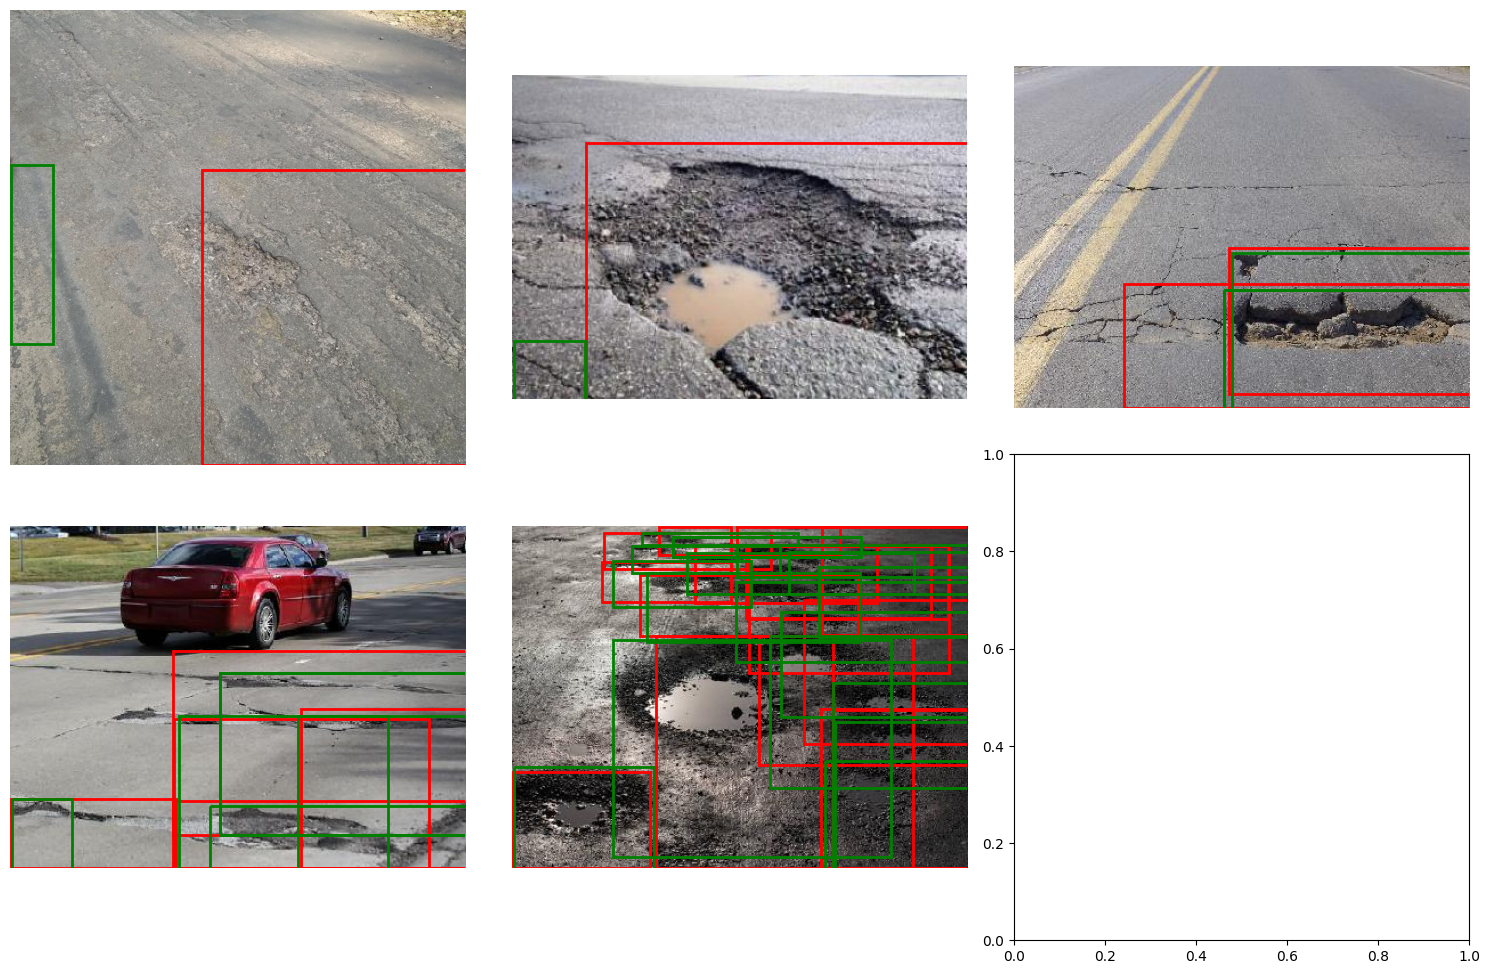

In [207]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Load the image
# img_path = "data/Potholes/annotated-images/img-631.jpg"  # Replace with the path to your actual image
# img = mpimg.imread(img_path)

# Create figure and axes
# fig, ax = plt.subplots()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, img in enumerate(images):    
    axes[idx].imshow(img)
    axes[idx].axis('off')

    cur_bbs = best_bbs_s[idx]
    for bbs in cur_bbs:
        LOG.info(f'bbs: {bbs}')
        cords = bbs[0]
        LOG.info(f'cords: {cords}')
        if cords is not None:
            rect = patches.Rectangle((cords[0], cords[1]), cords[2], cords[3], linewidth=2, edgecolor='r', facecolor='none')
            axes[idx].add_patch(rect)

    labels = labels_s[idx]
    if labels.ndim > 1:
        for label in labels:
            rect = patches.Rectangle((label[0], label[1]), label[2], label[3], linewidth=2, edgecolor='g', facecolor='none')
            axes[idx].add_patch(rect)
    else:
        rect = patches.Rectangle((label[0], label[1]), label[2], label[3], linewidth=2, edgecolor='g', facecolor='none')
    axes[idx].add_patch(rect)
# Add the rectangle to the Axes
# ax.add_patch(rect)

# Show the plot
plt.tight_layout()
plt.show()


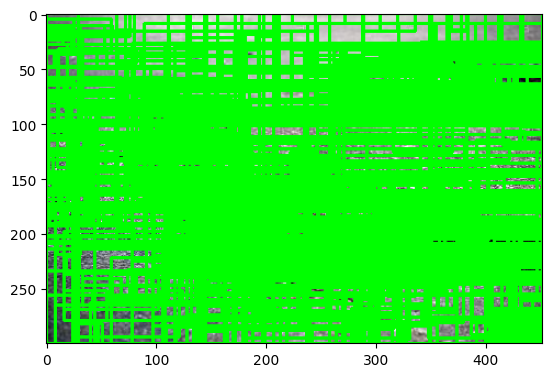

In [64]:
image, labels = next(iter(train_loader))
image = image.squeeze().permute(1, 2, 0).numpy()
labels = labels.squeeze().numpy()

image = cv2.imread("data/Potholes/annotated-images/img-631.jpg")
all_proposals = selective_search(image, method="fast")


image = cv2.imread("data/Potholes/annotated-images/img-631.jpg")
for (x,y,w,h) in all_proposals:
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

plt.imshow(image)
plt.show()

In [ ]:
def assign_label(proposal, label):